###  Covert the longitudinal blood pressure measurnments into a proper time series

In [1]:
import pandas as pd 
import sys 
print(sys.executable)

# Load the data with tab seperator  
df = pd.read_csv("patient_longitudinal.csv", sep='\t')

#  Convert `visit_date` to datetime and set as index
df['visit_date'] = pd.to_datetime(df['visit_date'], format='%Y-%m-%d')
df.set_index('visit_date', inplace=True)

# Handle duplicates by grouping with visit_date and applying mean aggregation
df = df[~df.index.duplicated(keep='first')].groupby(level=0).mean()

# Handle missing values by interpolating missing values 
df['bp_systolic'] = df['bp_systolic'].interpolate()

# Convert to pandas Series for a single time series of blood pressure measurements
blood_pressure_series = df['bp_systolic']



/opt/anaconda3/bin/python


### Plot the new longitudinal blood pressure time series

Matplotlib is building the font cache; this may take a moment.


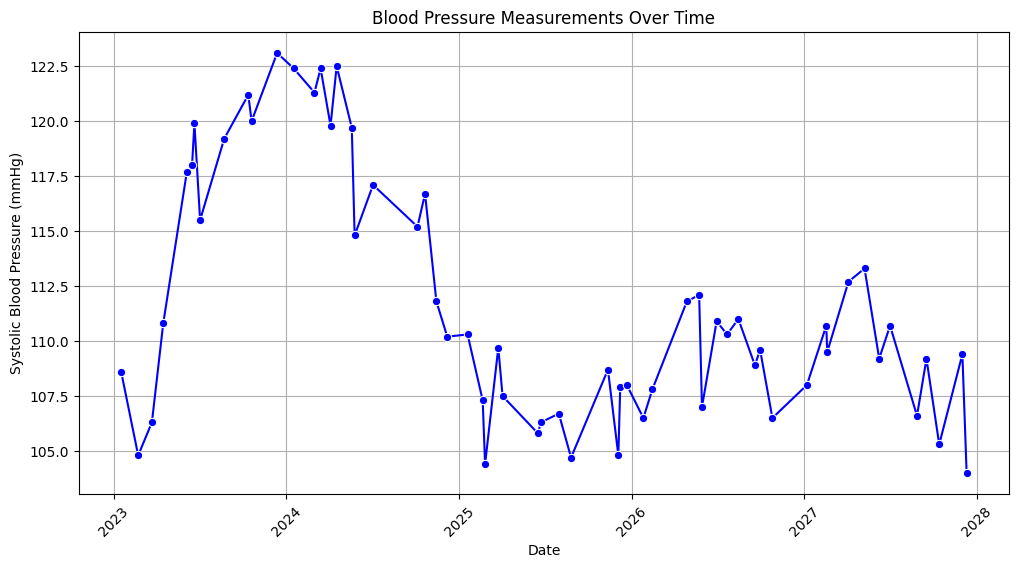

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the Series back to a DataFrame for Seaborn
df_plot = blood_pressure_series.reset_index()

# Plotting the time series with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x='visit_date', y='bp_systolic', marker='o', color='b')
plt.title('Blood Pressure Measurements Over Time')
plt.xlabel('Date')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()


###  Analyze blood pressure trends:
   - Resample the data to monthly frequency using mean aggregation
   - Calculate 3-month moving averages to smooth out short-term fluctuations

/var/folders/63/klpq6sss15lb697997qxym8m0000gn/T/ipykernel_28785/354375857.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_bp = blood_pressure_series.resample('M').mean()


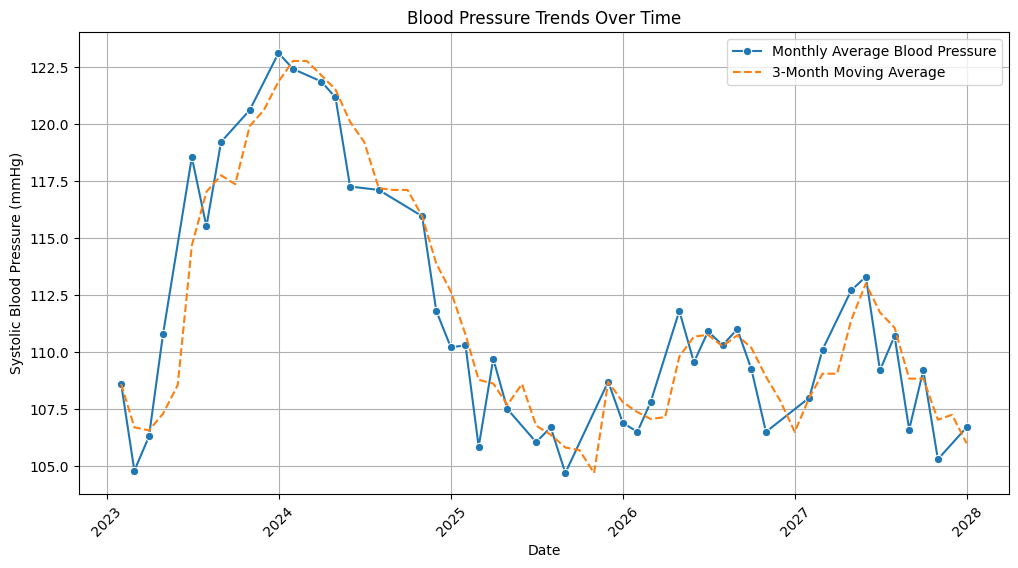

In [3]:
# Resample to monthly frequency
monthly_bp = blood_pressure_series.resample('M').mean()

# Calculate a 3-month moving average
smoothed_bp = monthly_bp.rolling(window=3, min_periods=1).mean()

# Combine both series into a DataFrame for easier plotting with Seaborn
df_plot = pd.DataFrame({
    'Monthly Average': monthly_bp,
    '3-Month Moving Average': smoothed_bp
}).reset_index()

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x='visit_date', y='Monthly Average', label='Monthly Average Blood Pressure', marker='o')
sns.lineplot(data=df_plot, x='visit_date', y='3-Month Moving Average', label='3-Month Moving Average', linestyle='--')

# Customizing the plot
plt.title('Blood Pressure Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.xticks(rotation=45)  # Rotate date labels for readability
plt.grid(True)
plt.legend()
plt.show()